# Golden Harvesting: A Predictive Model For Apple Quality Assurance

### Data Collection & Preparation 

In [1]:
# Importing The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read The Dataset
data = pd.read_csv('apple_quality.csv')
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
data.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


#### Data Preparation

In [4]:
data.shape

(4001, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
data.dropna(inplace=True)
data.shape

(4000, 9)

In [8]:
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [9]:
# Set the style
sns.set(style="whitegrid")
data = data.drop('A_id', axis=1)

<Figure size 1500x700 with 0 Axes>

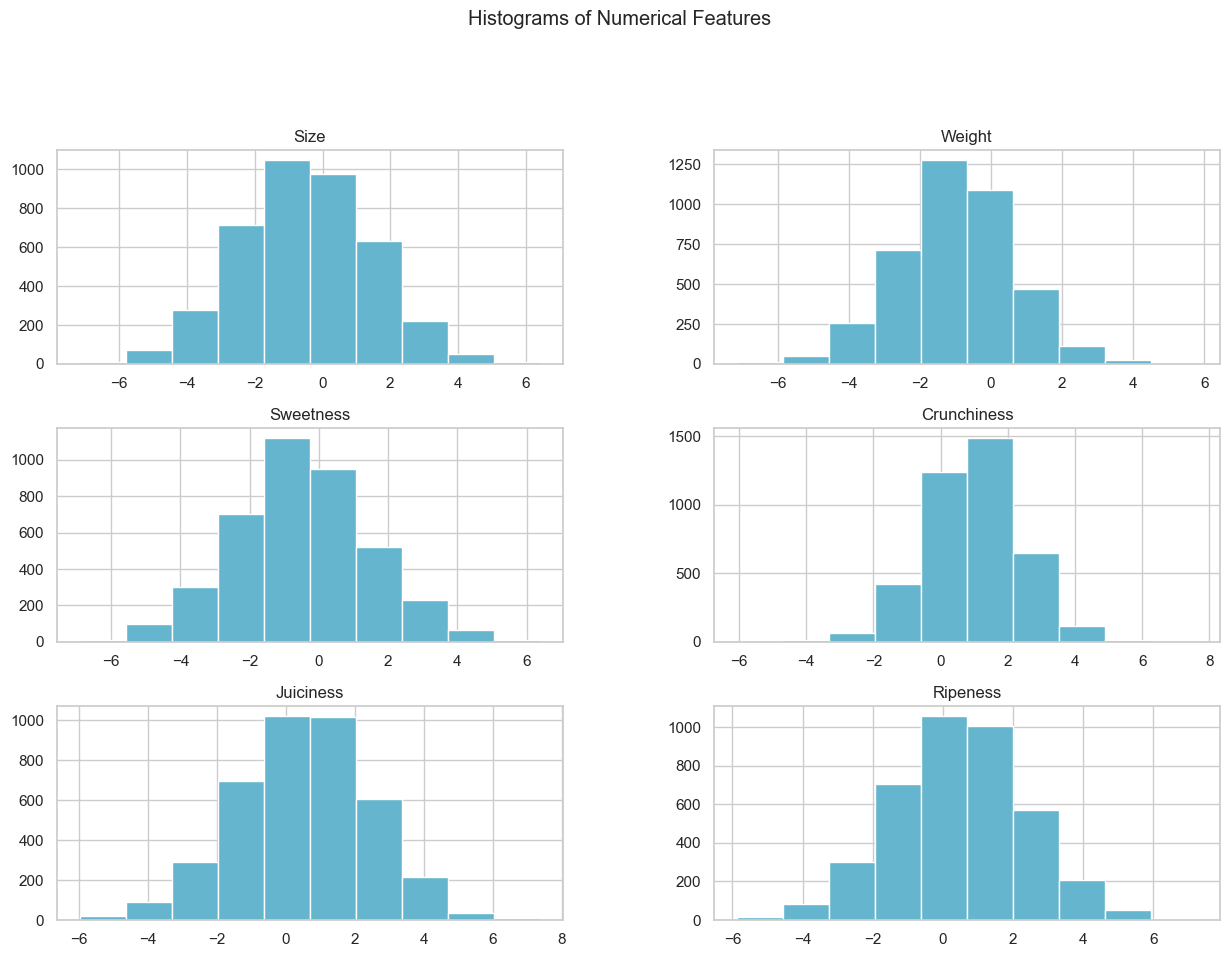

In [10]:
# Univariate Analysis
plt.figure(figsize=(15,7))
data.hist(bins=10, figsize=(15, 10), color='c')
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

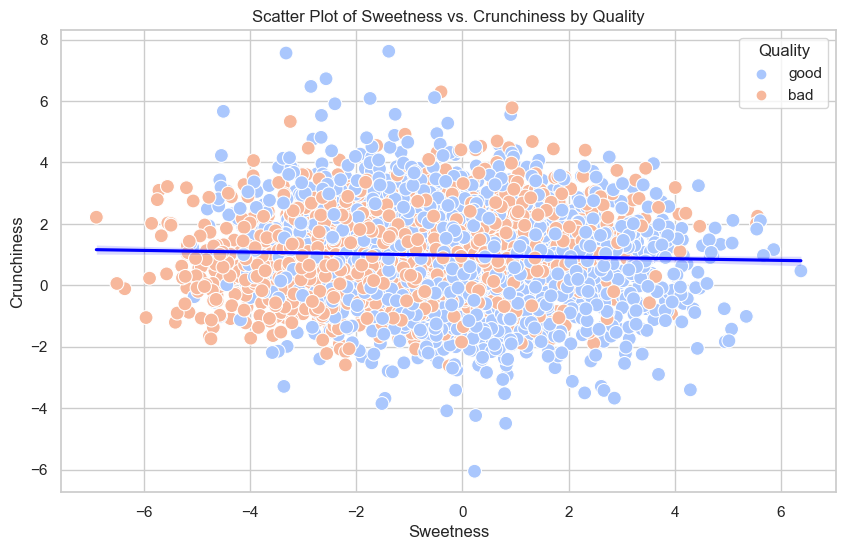

In [11]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sweetness', y='Crunchiness', hue='Quality', palette='coolwarm', data=data, s=100)
sns.regplot(x='Sweetness', y='Crunchiness', data=data, scatter=False, color='blue')
plt.title('Scatter Plot of Sweetness vs. Crunchiness by Quality')
plt.xlabel('Sweetness')
plt.ylabel('Crunchiness')
plt.show()

C:\Users\fs22a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fs22a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fs22a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fs22a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

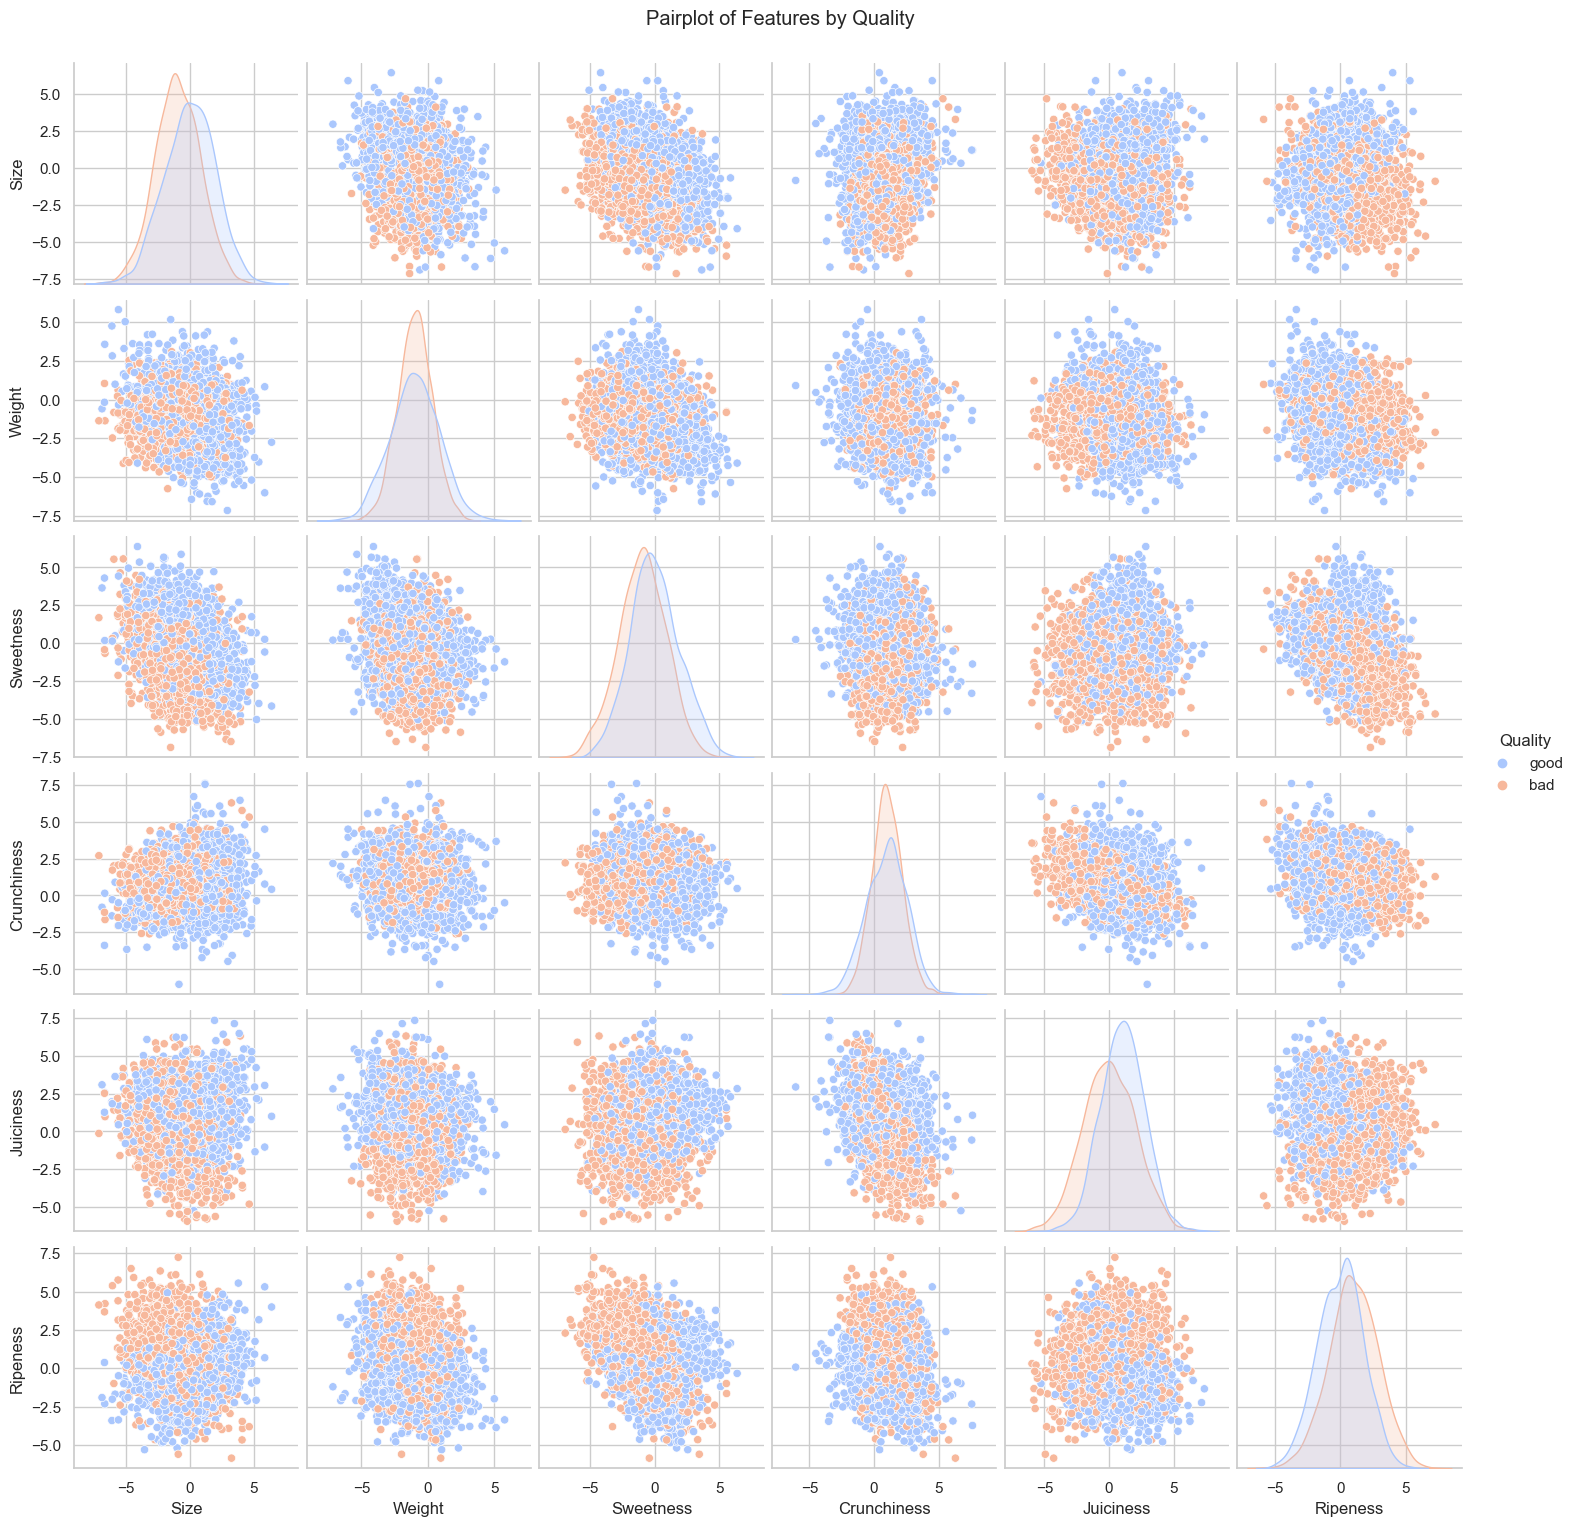

In [12]:
# Multivariate analysis
pair_plot = sns.pairplot(data, hue="Quality", diag_kind="kde", palette='coolwarm')
pair_plot.fig.suptitle("Pairplot of Features by Quality", y=1.02)
plt.show()

In [13]:
x = data.iloc[:,:-1]
x

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [14]:
y = pd.DataFrame(data['Quality'])
y

,Quality
0,good
1,good
2,bad
3,good
4,good
...,...
3995,bad
3996,good
3997,bad
3998,good


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X 

array([[-1.79842417, -0.95037339,  2.99342063, ...,  0.69054495,
        -0.08987211, -0.26941526],
       [-0.35906018, -1.15440431,  2.12769769, ...,  0.17676683,
         0.1970196 , -0.37899737],
       [ 0.1094454 , -0.22575916, -0.65250727, ...,  1.20542179,
        -0.28615565,  1.20604367],
       ...,
       [-1.1056547 , -0.71690397, -1.01378401, ...,  0.87437918,
         2.27595716, -0.66895013],
       [-1.81811235, -0.49290842,  1.45990059, ...,  0.85454883,
        -0.15141937, -1.09317096],
       [ 0.40540882, -0.45307081,  0.30449592, ...,  0.39095445,
        -0.68021237,  0.72176064]])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

C:\Users\fs22a\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, ..., 0, 1, 1])

In [17]:
x.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

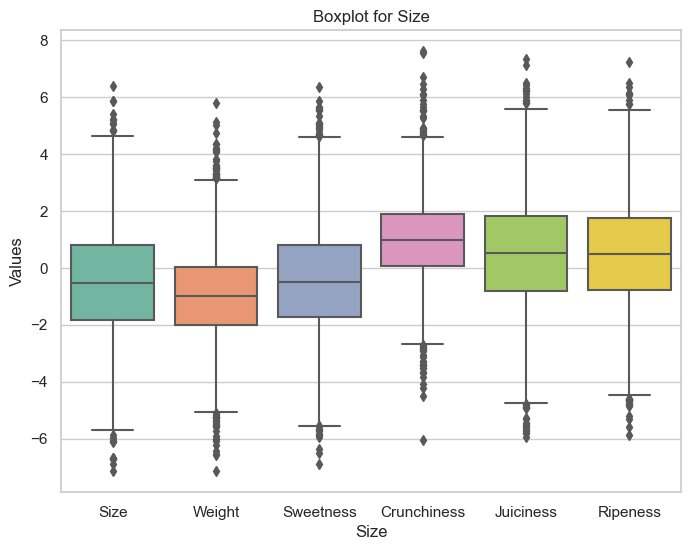

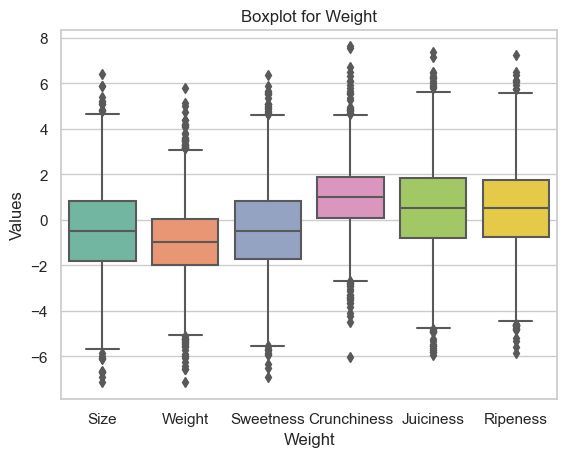

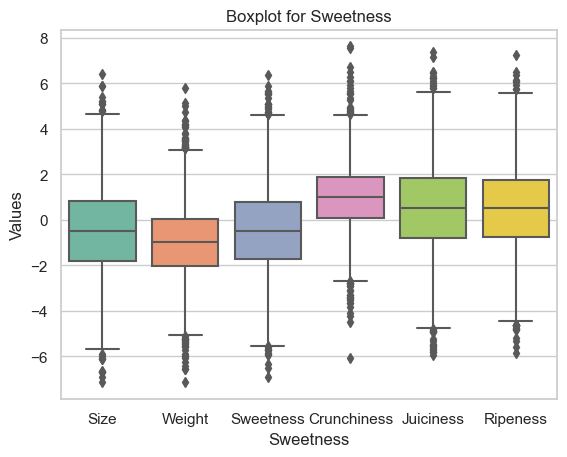

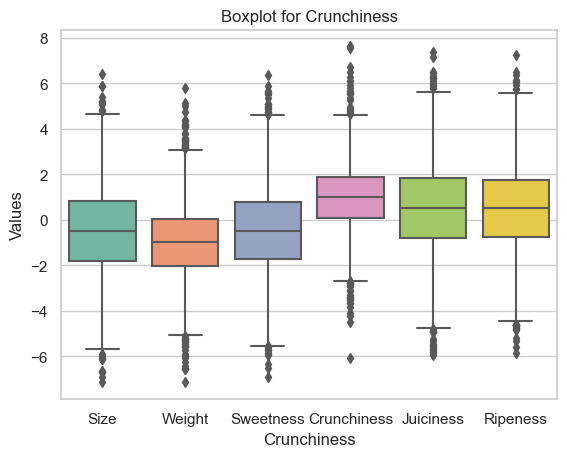

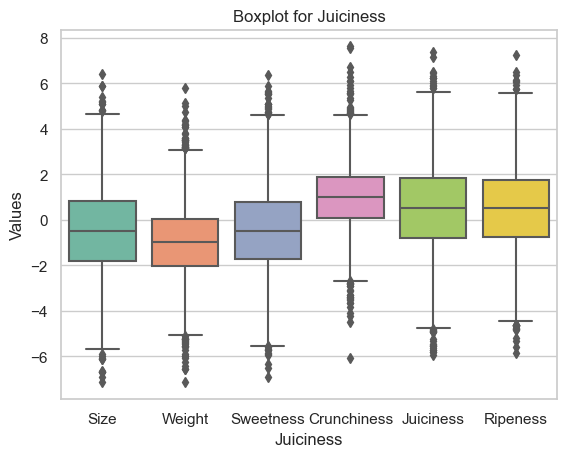

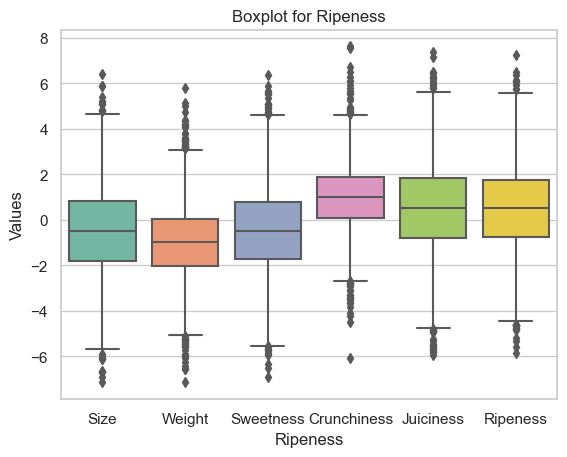

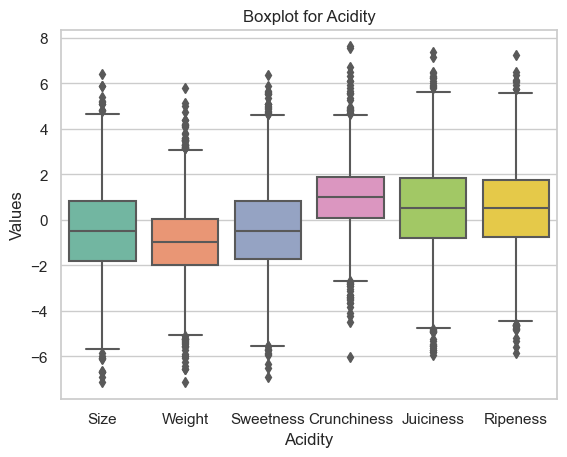

In [18]:
columns_of_interest = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
# Create boxplots for the selected columns
plt.figure(figsize=(8,6))
for column in columns_of_interest:
    sns.boxplot(x, orient="v", palette="Set2")
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

#### Handling outliers for the column Size

0.75    0.805526
0.25   -1.816765
Name: Size, dtype: float64
Q3(75th percentile)-> 0.8055264495000001
Q1(25th percentile)-> -1.816764527
IQR(InterQuartile Range)-> 2.6222909765
Max outliers-> 4.73896291425
Min outliers-> -5.75020099175


<Axes: >

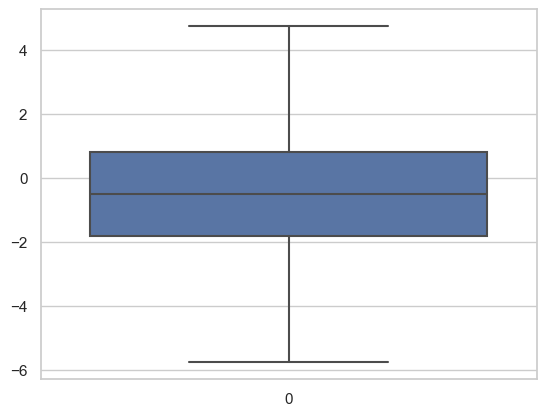

In [19]:
quant = data['Size'].quantile(q=[0.75,0.25])
print(quant)
Q3 = quant.loc[0.75]
print("Q3(75th percentile)->",Q3)
Q1 = quant.loc[0.25]
print("Q1(25th percentile)->",Q1)
IQR = Q3 - Q1
print("IQR(InterQuartile Range)->",IQR)
maxwhisker = Q3 + 1.5 * IQR
print("Max outliers->",maxwhisker)
minwhisker = Q1 - 1.5 * IQR
print("Min outliers->",minwhisker)
data['Size'] = np.where(data['Size'] > 4.73896291425, 4.73896291425, data['Size'])
data['Size'] = np.where(data['Size'] < -5.75020099175, -5.75020099175, data['Size'])
sns.boxplot(data['Size'])

#### Handling outliers for the column Weight

0.75    0.030976
0.25   -2.011770
Name: Weight, dtype: float64
Q3(75th percentile)-> 0.03097644
Q1(25th percentile)-> -2.01177029275
IQR(InterQuartile Range)-> 2.04274673275
Max outliers-> 3.0950965391249996
Min outliers-> -5.075890391874999


<Axes: >

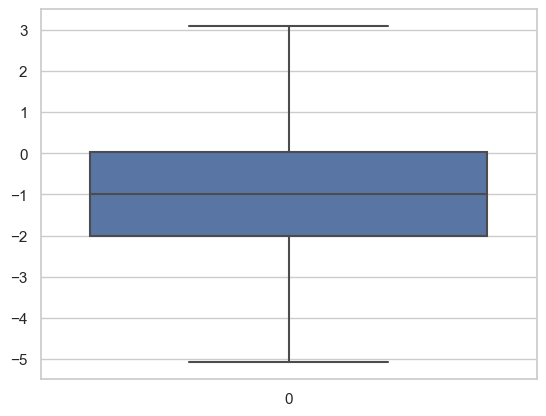

In [20]:
quant = data['Weight'].quantile(q=[0.75,0.25])
print(quant)
Q3 = quant.loc[0.75]
print("Q3(75th percentile)->",Q3)
Q1 = quant.loc[0.25]
print("Q1(25th percentile)->",Q1)
IQR = Q3 - Q1
print("IQR(InterQuartile Range)->",IQR)
maxwhisker = Q3 + 1.5 * IQR
print("Max outliers->",maxwhisker)
minwhisker = Q1 - 1.5 * IQR
print("Min outliers->",minwhisker)
data['Weight'] = np.where(data['Weight'] > 3.0950965391249996, 3.0950965391249996, data['Weight'])
data['Weight'] = np.where(data['Weight'] < -5.075890391874999, -5.075890391874999, data['Weight'])
sns.boxplot(data['Weight'])

#### Handling outliers for the column Sweetness

0.75    0.801922
0.25   -1.738425
Name: Sweetness, dtype: float64
Q3(75th percentile)-> 0.8019219209999999
Q1(25th percentile)-> -1.7384250625
IQR(InterQuartile Range)-> 2.5403469835
Max outliers-> 4.61244239625
Min outliers-> -5.54894553775


<Axes: >

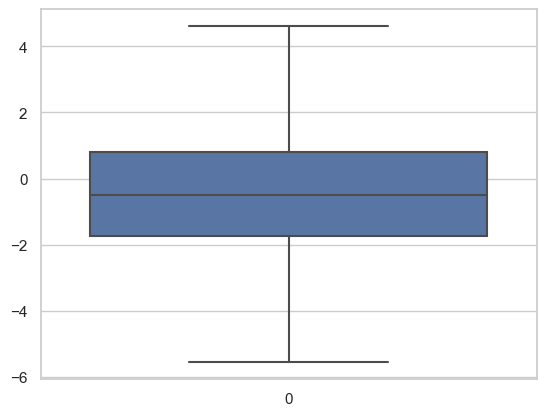

In [21]:
quant = data['Sweetness'].quantile(q=[0.75,0.25])
print(quant)
Q3 = quant.loc[0.75]
print("Q3(75th percentile)->",Q3)
Q1 = quant.loc[0.25]
print("Q1(25th percentile)->",Q1)
IQR = Q3 - Q1
print("IQR(InterQuartile Range)->",IQR)
maxwhisker = Q3 + 1.5 * IQR
print("Max outliers->",maxwhisker)
minwhisker = Q1 - 1.5 * IQR
print("Min outliers->",minwhisker)
data['Sweetness'] = np.where(data['Sweetness'] > 4.61244239625, 4.61244239625, data['Sweetness'])
data['Sweetness'] = np.where(data['Sweetness'] < -5.54894553775, -5.54894553775, data['Sweetness'])
sns.boxplot(data['Sweetness'])

#### Handling outliers for the column Crunchiness

0.75    1.894234
0.25    0.062764
Name: Crunchiness, dtype: float64
Q3(75th percentile)-> 1.8942342170000002
Q1(25th percentile)-> 0.06276439525000001
IQR(InterQuartile Range)-> 1.83146982175
Max outliers-> 4.641438949625
Min outliers-> -2.6844403373750003


<Axes: >

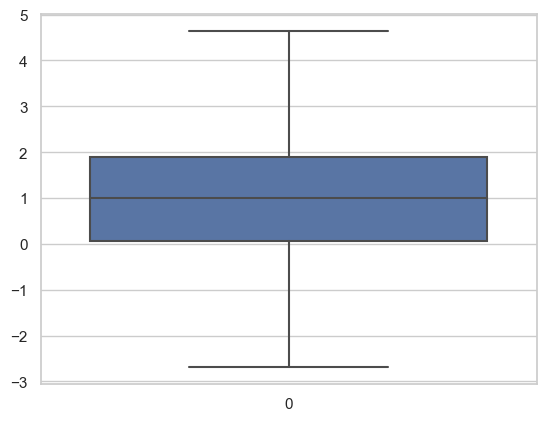

In [22]:
quant = data['Crunchiness'].quantile(q=[0.75,0.25])
print(quant)
Q3 = quant.loc[0.75]
print("Q3(75th percentile)->",Q3)
Q1 = quant.loc[0.25]
print("Q1(25th percentile)->",Q1)
IQR = Q3 - Q1
print("IQR(InterQuartile Range)->",IQR)
maxwhisker = Q3 + 1.5 * IQR
print("Max outliers->",maxwhisker)
minwhisker = Q1 - 1.5 * IQR
print("Min outliers->",minwhisker)
data['Crunchiness'] = np.where(data['Crunchiness'] > 4.641438949625, 4.641438949625, data['Crunchiness'])
data['Crunchiness'] = np.where(data['Crunchiness'] < -2.6844403373750003, -2.6844403373750003, 
                               data['Crunchiness'])
sns.boxplot(data['Crunchiness'])

#### Handling outliers for the column Juiciness

0.75    1.835976
0.25   -0.801286
Name: Juiciness, dtype: float64
Q3(75th percentile)-> 1.8359763875
Q1(25th percentile)-> -0.80128581525
IQR(InterQuartile Range)-> 2.6372622027499997
Max outliers-> 5.791869691624999
Min outliers-> -4.7571791193749995


<Axes: >

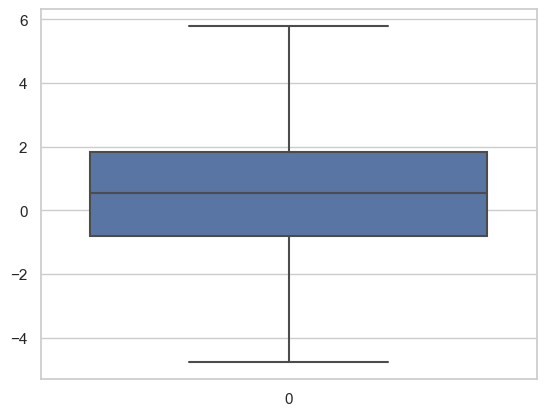

In [23]:
quant = data['Juiciness'].quantile(q=[0.75,0.25])
print(quant)
Q3 = quant.loc[0.75]
print("Q3(75th percentile)->",Q3)
Q1 = quant.loc[0.25]
print("Q1(25th percentile)->",Q1)
IQR = Q3 - Q1
print("IQR(InterQuartile Range)->",IQR)
maxwhisker = Q3 + 1.5 * IQR
print("Max outliers->",maxwhisker)
minwhisker = Q1 - 1.5 * IQR
print("Min outliers->",minwhisker)
data['Juiciness'] = np.where(data['Juiciness'] > 5.791869691624999, 5.791869691624999, data['Juiciness'])
data['Juiciness'] = np.where(data['Juiciness'] < -4.7571791193749995, -4.7571791193749995, 
                             data['Juiciness'])
sns.boxplot(data['Juiciness'])

#### Handling outliers for the column Ripeness

0.75    1.766212
0.25   -0.771677
Name: Ripeness, dtype: float64
Q3(75th percentile)-> 1.76621164075
Q1(25th percentile)-> -0.7716768665
IQR(InterQuartile Range)-> 2.53788850725
Max outliers-> 5.573044401624999
Min outliers-> -4.578509627375


<Axes: >

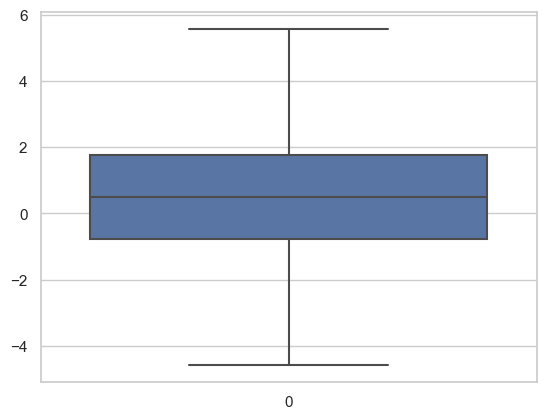

In [24]:
quant = data['Ripeness'].quantile(q=[0.75,0.25])
print(quant)
Q3 = quant.loc[0.75]
print("Q3(75th percentile)->",Q3)
Q1 = quant.loc[0.25]
print("Q1(25th percentile)->",Q1)
IQR = Q3 - Q1
print("IQR(InterQuartile Range)->",IQR)
maxwhisker = Q3 + 1.5 * IQR
print("Max outliers->",maxwhisker)
minwhisker = Q1 - 1.5 * IQR
print("Min outliers->",minwhisker)
data['Ripeness'] = np.where(data['Ripeness'] > 5.573044401624999, 5.573044401624999, data['Ripeness'])
data['Ripeness'] = np.where(data['Ripeness'] < -4.578509627375, -4.578509627375, data['Ripeness'])
sns.boxplot(data['Ripeness'])

#### Handling outliers for the column Acidity

0.75    1.510493
0.25   -1.377424
Name: Acidity, dtype: float64
Q3 (75th percentile) -> 1.510492756
Q1 (25th percentile) -> -1.3774240784999998
IQR (InterQuartile Range) -> 2.8879168345
Max outliers -> 5.84236800775
Min outliers -> -5.7092993302499995


<Axes: >

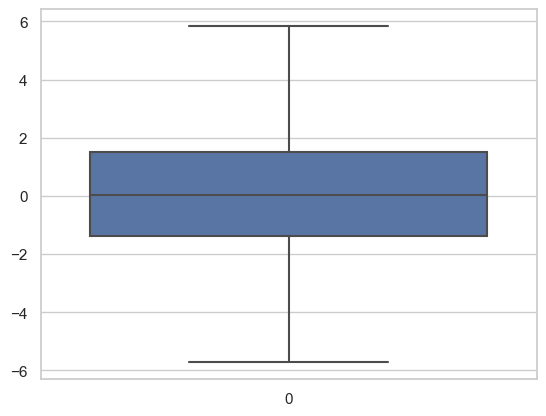

In [25]:
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')
data = data.dropna(subset=['Acidity'])
quant = data['Acidity'].quantile(q=[0.75, 0.25])
print(quant)
Q3 = quant.loc[0.75]
print("Q3 (75th percentile) ->", Q3)
Q1 = quant.loc[0.25]
print("Q1 (25th percentile) ->", Q1)
IQR = Q3 - Q1
print("IQR (InterQuartile Range) ->", IQR)
maxwhisker = Q3 + 1.5 * IQR
print("Max outliers ->", maxwhisker)
minwhisker = Q1 - 1.5 * IQR
print("Min outliers ->", minwhisker)
data['Acidity'] = np.where(data['Acidity'] > maxwhisker, maxwhisker, data['Acidity'])
data['Acidity'] = np.where(data['Acidity'] < minwhisker, minwhisker, data['Acidity'])
sns.boxplot(data['Acidity'])

### Exploratory Data Analysis

In [26]:
# Descriptive Statistics
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.502695,-0.991229,-0.472248,0.984194,0.513127,0.498102,0.076639
std,1.917446,1.574517,1.931684,1.369437,1.917024,1.866614,2.101441
min,-5.750201,-5.075890,-5.548946,-2.684440,-4.757179,-4.578510,-5.709299
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,4.738963,3.095097,4.612442,4.641439,5.791870,5.573044,5.842368


In [27]:
data.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Quality')

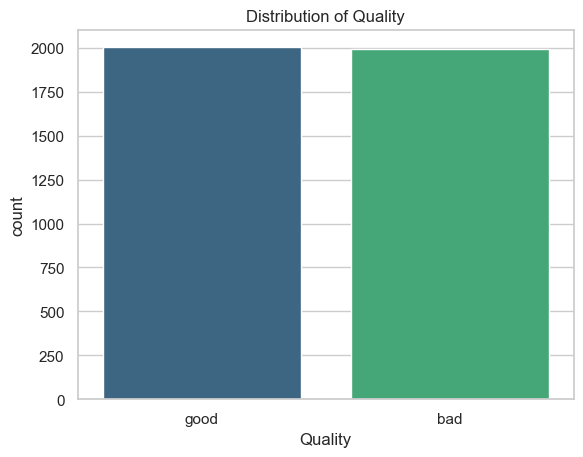

In [28]:
# Visual Analysis
sns.countplot(x='Quality', data=data, palette='viridis')
plt.title('Distribution of Quality')

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model Building

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [31]:
# Decision tree model 
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
dt_pred = model1.predict(x_test)
acc_score = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision tree is %.2f"%accuracy_score(y_test, dt_pred))
print("Confusion matrix of Decision tree is as follows:")
confusion_matrix(y_test, dt_pred)

Accuracy of Decision tree is 0.81
Confusion matrix of Decision tree is as follows:


array([[323,  78],
       [ 70, 329]], dtype=int64)

In [32]:
# Random forest model 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=180)
model2.fit(x_train, y_train)
rf_pred = model2.predict(x_test)
acc_score = accuracy_score(y_test, rf_pred)
print("Accuracy of Random forest is %.2f"%accuracy_score(y_test, rf_pred))
print("Confusion matrix of Random forest is as follows:")
confusion_matrix(y_test, rf_pred)

Accuracy of Random forest is 0.91
Confusion matrix of Random forest is as follows:


array([[362,  39],
       [ 36, 363]], dtype=int64)

In [33]:
# XGBoost model
import xgboost as xgb
model3 = xgb.XGBClassifier()
model3.fit(x_train, y_train)
xgb_pred = model3.predict(x_test)
acc_score = accuracy_score(y_test, xgb_pred)
print("Accuracy of XGBoost is %.2f"%accuracy_score(y_test,xgb_pred))
print("Confusion matrix of XGBoost is as follows:")
confusion_matrix(y_test, xgb_pred)

Accuracy of XGBoost is 0.91
Confusion matrix of XGBoost is as follows:


array([[363,  38],
       [ 37, 362]], dtype=int64)

In [34]:
# Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(x_train, y_train)
lr_pred = model4.predict(x_test)
acc_score = accuracy_score(y_test, lr_pred)
print("Accuracy of Logistic Regression is %.2f"%accuracy_score(y_test, lr_pred))
print("Confusion matrix of Logistic Regression is as follows:")
confusion_matrix(y_test, lr_pred)

Accuracy of Logistic Regression is 0.75
Confusion matrix of Logistic Regression is as follows:


array([[303,  98],
       [ 99, 300]], dtype=int64)

In [35]:
# Support Vector Machine model
from sklearn.svm import SVC
model5 = SVC()
model5.fit(x_train,y_train)
svm_pred = model5.predict(x_test)
acc_score = accuracy_score(y_test, svm_pred)
print("Accuracy of Support Vector Machine is %.2f"%accuracy_score(y_test, svm_pred))
print("Confusion matrix of Support Vector Machine is as follows:")
confusion_matrix(y_test, svm_pred)

Accuracy of Support Vector Machine is 0.90
Confusion matrix of Support Vector Machine is as follows:


array([[363,  38],
       [ 39, 360]], dtype=int64)

In [36]:
# K Nearest Neighbor model
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier()
model6.fit(x_train,y_train)
knn_pred = model6.predict(x_test)
acc_score = accuracy_score(y_test, knn_pred)
print("Accuracy of K Nearest Neighbor is %.2f"%accuracy_score(y_test, knn_pred))
print("Confusion matrix of K Nearest Neighbor is as follows:")
confusion_matrix(y_test, knn_pred)

Accuracy of K Nearest Neighbor is 0.90
Confusion matrix of K Nearest Neighbor is as follows:


array([[360,  41],
       [ 38, 361]], dtype=int64)

In [37]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model7 = GaussianNB()
model7.fit(x_train,y_train)  
nb_pred = model7.predict(x_test) 
acc_score = accuracy_score(y_test, nb_pred)
print("Accuracy of Naive Baye is %.2f"%accuracy_score(y_test, nb_pred))
print("Confusion matrix of Naive Baye is as follows:")
confusion_matrix(y_test, nb_pred)

Accuracy of Naive Baye is 0.76
Confusion matrix of Naive Baye is as follows:


array([[312,  89],
       [101, 298]], dtype=int64)

### Performance testing & Hyperparameter tuning

In [38]:
print(classification_report(dt_pred, y_test))           # Decision tree

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       393
           1       0.82      0.81      0.82       407

    accuracy                           0.81       800
   macro avg       0.82      0.82      0.81       800
weighted avg       0.82      0.81      0.82       800



In [39]:
print(classification_report(rf_pred,y_test))            # Random forest

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       398
           1       0.91      0.90      0.91       402

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [40]:
print(classification_report(xgb_pred, y_test))           # Xgboost 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       400
           1       0.91      0.91      0.91       400

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [41]:
print(classification_report(lr_pred,y_test))             # Logistic regression 

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       402
           1       0.75      0.75      0.75       398

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



In [42]:
print(classification_report(svm_pred,y_test))               # SVM

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       402
           1       0.90      0.90      0.90       398

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [43]:
print(classification_report(knn_pred,y_test))              # KNN

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       398
           1       0.90      0.90      0.90       402

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [44]:
print(classification_report(nb_pred,y_test))               # Naïve Bayes

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       413
           1       0.75      0.77      0.76       387

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



#### Hyperparameter tuning to increase accuracy

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [47]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Best Accuracy Score: 0.8887500000000002


In [48]:
best_model = grid_search.best_estimator_
xgb_pred = best_model.predict(x_test)
acc_score = accuracy_score(y_test, xgb_pred)
print("Accuracy of XGBoost(best parameters) {:.2f}%".format(acc_score * 100))
print("Confusion matrix of XGBoost is as follows:")
print(confusion_matrix(y_test, xgb_pred))

Accuracy of XGBoost(best parameters) 90.50%
Confusion matrix of XGBoost is as follows:
[[359  42]
 [ 34 365]]


In [49]:
print(classification_report(xgb_pred, y_test)) # Xgboost 

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       393
           1       0.91      0.90      0.91       407

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.90       800
weighted avg       0.91      0.91      0.91       800



In [50]:
param_grid = {
    'n_estimators': [100, 120, 140],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [51]:
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5,scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
Best Accuracy Score: 0.8815625


In [52]:
best_rf_model = grid_search.best_estimator_
rf_pred = best_rf_model.predict(x_test)
acc_score = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest(best parameters) {:.2f}%".format(acc_score * 100))
print("Confusion matrix of Random Forest is as follows:")
print(confusion_matrix(y_test, rf_pred))

Accuracy of Random Forest(best parameters) 90.88%
Confusion matrix of Random Forest is as follows:
[[359  42]
 [ 31 368]]


In [53]:
print(classification_report(rf_pred, y_test)) # Random Forest 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       390
           1       0.92      0.90      0.91       410

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



### Model Deployment

In [54]:
import pickle

In [56]:
# Save the scaler to a file
pickle.dump(scaler, open("apple_scaler.pkl", "wb")) 

In [57]:
# Save the best model to a file
pickle.dump(best_rf_model, open('rf.pkl','wb'))